In [16]:
import pandas as pd
import matplotlib.pyplot as plt

import torch
import numpy as np

from brokenaxes import brokenaxes

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [17]:
# CSV 파일에 접근
maml_info = pd.read_csv('../MAML_filter128/MAML_filter128_inner_loop.csv')
arbiter_info = pd.read_csv('../MAML+Arbiter_5way_5shot/MAML+Arbiter_5way_5shot_inner_loop.csv')
# alfa_info = pd.read_csv('../MAML+ALFA/alfa+maml_inner_loop_test.csv')
# l2f_info = pd.read_csv('../MAML+L2F/MAML+L2F_inner_loop_test.csv')

# 훈련 정보만 가지고 온다
maml_info_train = maml_info[maml_info['phase']=='val']
arbiter_info_train= arbiter_info[arbiter_info['phase']=='val']
# alfa_info = alfa_info[alfa_info['phase'] == 'val']
# l2f_info = l2f_info[alfa_info['phase'] == 'val']

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1. 정보를 Domain 별로 압축

In [18]:
maml_info_mini_imagenet = maml_info_train[maml_info_train['current_iter']=='mini_imagenet_full_size']
maml_info_mini_imagenet = maml_info_mini_imagenet.groupby('num_step')


# maml_info_cifar_fs = maml_info_train[maml_info_train['current_iter']=='CIFAR_FS']
# maml_info_cifar_fs = maml_info_cifar_fs.groupby('num_step')

# maml_info_CUB = maml_info_train[maml_info_train['current_iter']=='CUB']
# maml_info_CUB = maml_info_CUB.groupby('num_step')
maml_info_mini_imagenet.head()

,current_iter,phase,num_step,loss_mean,loss_var,loss_std,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,...,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,all_grads_var,all_grads_l2norm,all_grads_mean,all_weights_norm,all_weights_var,all_weights_mean,gsnr
800000,mini_imagenet_full_size,val,0,6.789026,25.406872,5.040523,0.037239,306.532837,7.023611,0.012891,...,0.302346,0.162012,0.006538,0.003446,39.916985,-0.000108,24.663403,0.001313,-0.001534,3.394825e-06
800001,mini_imagenet_full_size,val,1,5.886771,19.512297,4.417273,-0.033250,240.461319,5.373062,0.007250,...,0.294401,0.157217,0.006155,0.002707,35.375698,-0.000269,24.663599,0.001313,-0.001531,2.681257e-05
800002,mini_imagenet_full_size,val,2,3.165725,8.040036,2.835496,-0.007655,156.952301,3.483741,0.003454,...,0.294037,0.157403,0.006170,0.001250,24.036470,-0.000079,24.663630,0.001313,-0.001530,4.942081e-06
800003,mini_imagenet_full_size,val,3,0.258014,0.120033,0.346457,-0.007046,61.288849,1.466390,0.000573,...,0.296938,0.158445,0.006252,0.000094,6.595025,-0.000108,24.663816,0.001313,-0.001529,1.246740e-04
800004,mini_imagenet_full_size,val,4,0.065818,0.003579,0.059826,0.000199,16.608643,0.398143,0.000046,...,0.296962,0.158410,0.006249,0.000003,1.127222,0.000015,24.663906,0.001313,-0.001529,7.828625e-05
800005,mini_imagenet_full_size,val,0,7.081532,26.000010,5.099020,0.036760,328.991394,7.583583,0.015294,...,0.302344,0.162016,0.006538,0.003709,41.409885,-0.000115,24.663523,0.001313,-0.001534,3.535640e-06
800006,mini_imagenet_full_size,val,1,6.024052,21.915250,4.681373,-0.031204,192.346909,4.406045,0.004645,...,0.294464,0.157207,0.006154,0.002869,36.425945,-0.000622,24.663813,0.001313,-0.001527,1.348030e-04
800007,mini_imagenet_full_size,val,2,3.678428,9.671968,3.109979,-0.002375,150.681610,3.508734,0.003558,...,0.290772,0.156935,0.006133,0.001747,28.421091,-0.000271,24.664026,0.001313,-0.001525,4.201750e-05
800008,mini_imagenet_full_size,val,3,0.907040,1.953585,1.397707,-0.003472,73.837509,1.726639,0.000851,...,0.296739,0.158500,0.006257,0.000460,14.590472,0.000095,24.664289,0.001313,-0.001526,1.956703e-05
800009,mini_imagenet_full_size,val,4,0.060351,0.004207,0.064861,0.001849,11.888840,0.275343,0.000019,...,0.296397,0.158312,0.006242,0.000003,1.189597,-0.000007,24.664368,0.001313,-0.001525,1.824312e-05


In [19]:
# mini-imagenet
arbiter_info_mini_imagenet = arbiter_info[arbiter_info['current_iter']=='mini_imagenet_full_size']
arbiter_info_mini_imagenet = arbiter_info_mini_imagenet.groupby('num_step')

# # tiered-imagenet
# arbiter_info_tiered_imagenet = arbiter_info[arbiter_info['current_iter']=='tiered_imagenet']
# arbiter_info_tiered_imagenet = arbiter_info_tiered_imagenet.groupby('num_step')
# # CIFAR_FS
# arbiter_info_CIFAR_FS = arbiter_info[arbiter_info['current_iter']=='CIFAR_FS']
# arbiter_info_CIFAR_FS = arbiter_info_CIFAR_FS.groupby('num_step')
# # CUB
# arbiter_info_CUB = arbiter_info[arbiter_info['current_iter']=='CUB']
# arbiter_info_CUB = arbiter_info_CUB.groupby('num_step')

# 'layer_dict.conv0.conv.weight_grad_L2norm', 
# 'layer_dict.conv1.conv.weight_grad_L2norm', 
# 'layer_dict.conv2.conv.weight_grad_L2norm',
# 'layer_dict.conv3.conv.weight_grad_L2norm',
# 'layer_dict.linear.weights_grad_L2norm'
arbiter_info_mini_imagenet.head()

,current_iter,phase,num_step,loss_mean,loss_var,loss_std,layer_dict.conv0.conv.weight_alpha,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,...,pre_all_grads_l2norm,pre_all_grads_mean,pre_gsnr,all_grads_var,all_grads_l2norm,all_grads_mean,all_weights_norm,all_weights_var,all_weights_mean,gsnr
800000,mini_imagenet_full_size,val,0,1.621284,0.110421,0.332297,0.000003,-1.360282e-08,0.000102,0.000003,...,9.474751,-0.000196,0.000198,0.003736,41.561863,-0.000095,25.189804,0.001368,-0.002176,2.397892e-06
800001,mini_imagenet_full_size,val,1,0.792340,0.061525,0.248042,0.000003,-4.026093e-09,0.000127,0.000003,...,7.773406,-0.000067,0.000034,0.003581,40.691750,-0.000384,25.193195,0.001368,-0.002172,4.116216e-05
800002,mini_imagenet_full_size,val,2,0.288294,0.033081,0.181881,0.000005,-8.446361e-09,0.000185,0.000005,...,5.135486,-0.000053,0.000050,0.003325,39.214180,-0.000873,25.196276,0.001368,-0.002164,2.291345e-04
800003,mini_imagenet_full_size,val,3,0.069121,0.005238,0.072371,0.000008,-1.958661e-08,0.000280,0.000008,...,2.462364,-0.000032,0.000077,0.003082,37.750610,-0.000774,25.199169,0.001369,-0.002156,1.945405e-04
800004,mini_imagenet_full_size,val,4,0.007694,0.000093,0.009626,0.000011,-2.889364e-08,0.000386,0.000011,...,0.474221,-0.000006,0.000083,0.002898,36.605389,-0.000713,25.201942,0.001369,-0.002149,1.756456e-04
800005,mini_imagenet_full_size,val,0,1.603698,0.055565,0.235722,0.000003,-1.302815e-09,0.000111,0.000003,...,9.120506,-0.000061,0.000020,0.003731,41.535225,-0.000306,25.189800,0.001368,-0.002174,2.501978e-05
800006,mini_imagenet_full_size,val,1,0.750589,0.039450,0.198619,0.000004,-1.982390e-09,0.000136,0.000004,...,7.948721,-0.000121,0.000107,0.003542,40.469013,-0.000690,25.193119,0.001368,-0.002167,1.344421e-04
800007,mini_imagenet_full_size,val,2,0.249275,0.013833,0.117614,0.000005,1.422335e-09,0.000191,0.000005,...,5.387200,-0.000028,0.000012,0.003301,39.070023,-0.000740,25.196251,0.001368,-0.002160,1.657303e-04
800008,mini_imagenet_full_size,val,3,0.045746,0.000409,0.020223,0.000009,-4.867815e-09,0.000325,0.000009,...,1.732341,-0.000012,0.000022,0.003005,37.274998,-0.000808,25.199034,0.001369,-0.002152,2.171120e-04
800009,mini_imagenet_full_size,val,4,0.003638,0.000002,0.001577,0.000012,-2.492387e-08,0.000417,0.000012,...,0.198917,-0.000004,0.000154,0.002872,36.445953,-0.000809,25.201721,0.001369,-0.002144,2.280541e-04


Text(0.5, 1.0, 'Loss Distribution')

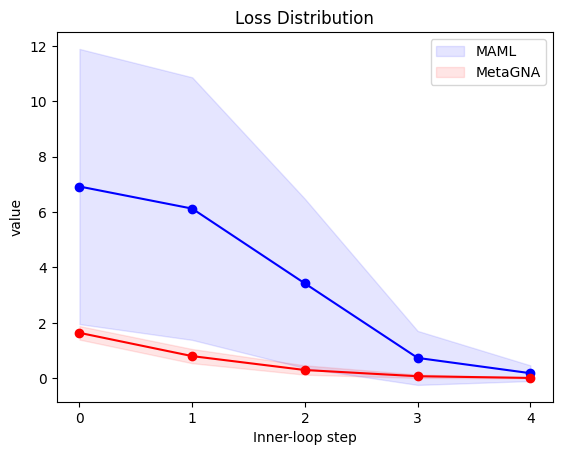

In [28]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_info_mini_imagenet['loss_mean'].mean()
arbiter_mean_df = arbiter_info_mini_imagenet['loss_mean'].mean()
# alfa_mean_df = alfa_info['loss_mean'].mean()
# l2f_mean_df = l2f_info['loss_mean'].mean()


maml_std_devs = maml_info_mini_imagenet['loss_std'].mean()
arbiter_std_devs= arbiter_info_mini_imagenet['loss_std'].mean()
# alfa_std_devs = alfa_info['loss_std'].mean()
# l2f_std_devs = l2f_info['loss_std'].mean()


# maml_mean_df = np.log(maml_mean_df)
# maml_std_devs = np.log(maml_std_devs)

# arbiter_mean_df = np.log(arbiter_mean_df)
# arbiter_std_devs = np.log(arbiter_std_devs)


plt.plot(x, maml_mean_df, '-o', color='b')#, label='MAML')
plt.fill_between(x, maml_mean_df - maml_std_devs, maml_mean_df + maml_std_devs, color='b', alpha=0.1, label='MAML')

# plt.plot(x, l2f_mean_df, '-o', color='b')#, label='MAML')
# plt.fill_between(x, l2f_mean_df - l2f_std_devs, l2f_mean_df + l2f_std_devs, color='b', alpha=0.1, label='L2F')

# plt.plot(x, alfa_mean_df, '-o', color='b')#, label='MAML')
# plt.fill_between(x, alfa_mean_df - alfa_std_devs, alfa_mean_df + alfa_std_devs, color='b', alpha=0.1, label='ALFA')

plt.plot(x, arbiter_mean_df, '-o', color='r')#, label='MetaGNA')
plt.fill_between(x, arbiter_mean_df - arbiter_std_devs, arbiter_mean_df + arbiter_std_devs, color='r', alpha=0.1, label='MetaGNA')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Loss Distribution')

Text(0.5, 1.0, 'Gradient norm')

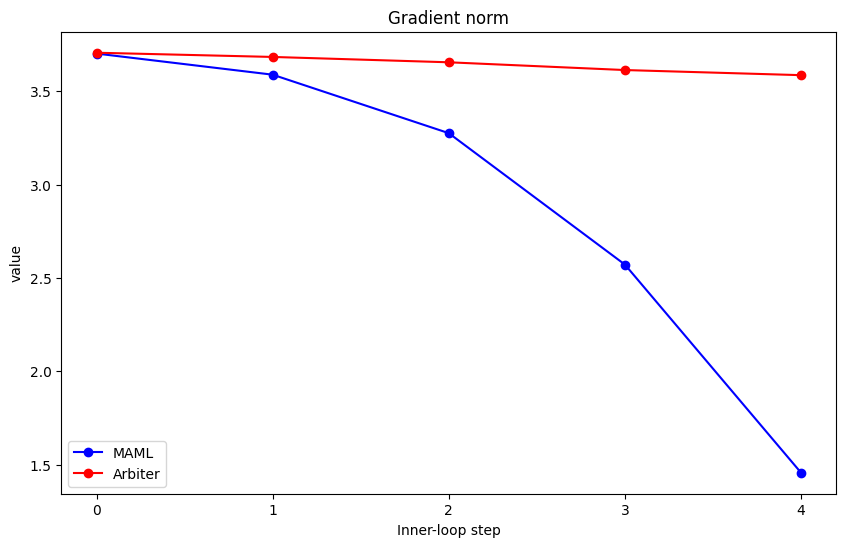

In [21]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_info_mini_imagenet['all_grads_l2norm'].mean()
# before_arbiter_mean_df = arbiter_info_mini_imagenet['pre_all_grads_l2norm'].mean()
arbiter_mean_df = arbiter_info_mini_imagenet['all_grads_l2norm'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)
# arbiter_withoutWN_means = np.log(arbiter_withoutWN_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
# plt.plot(x, before_arbiter_mean_df, '-o', color='g', label='before_Arbiter')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Gradient norm')

Text(0.5, 1.0, 'GSNR')

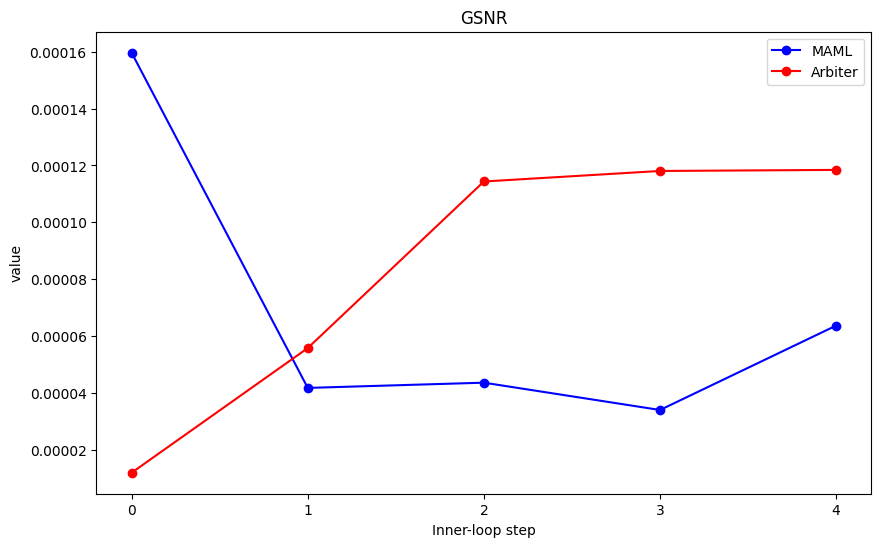

In [22]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_info_mini_imagenet['gsnr'].mean()
#arbiter_mean_df = arbiter_info_mini_imagenet['pre_gsnr'].mean()
arbiter_mean_df = arbiter_info_mini_imagenet['gsnr'].mean()
# l2f_mean_df = l2f_info['gsnr'].mean()
# alfa_mean_df = alfa_info['gsnr'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values
#l2f_mean_df = l2f_mean_df.values

# 데이터에 로그 변환 적용
# maml_means = np.log(maml_means)
# arbiter_means = np.log(arbiter_means)
# arbiter_withoutWN_means = np.log(arbiter_withoutWN_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
#plt.plot(x, l2f_mean_df, '-o', color='g', label='L2F')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('GSNR')

Text(0.5, 1.0, 'Gradient Varaince')

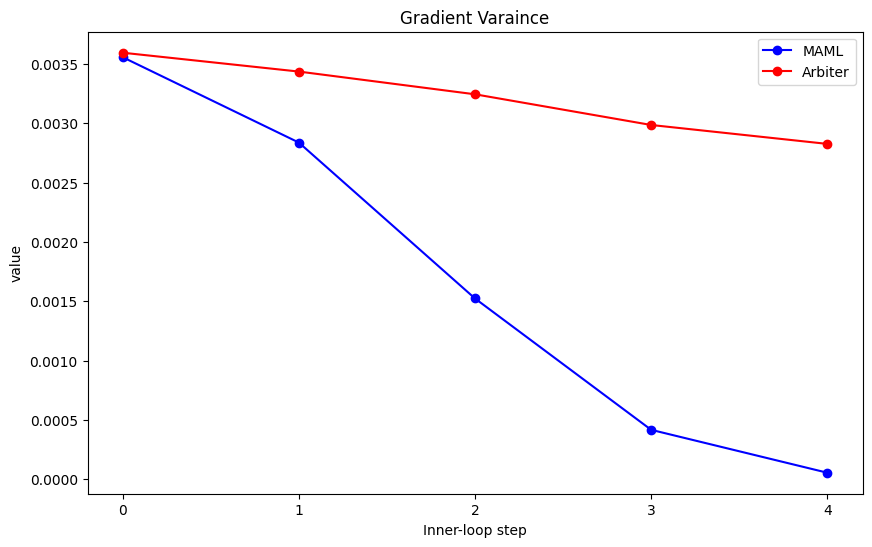

In [23]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_info_mini_imagenet['all_grads_var'].mean()
# arbiter_mean_df = arbiter_info_mini_imagenet['pre_all_grads_var'].mean()
arbiter_mean_df = arbiter_info_mini_imagenet['all_grads_var'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
# maml_means = np.log(maml_means)
# arbiter_means = np.log(arbiter_means)
# arbiter_withoutWN_means = np.log(arbiter_withoutWN_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Gradient Varaince')

Text(0.5, 1.0, 'Gradient mean')

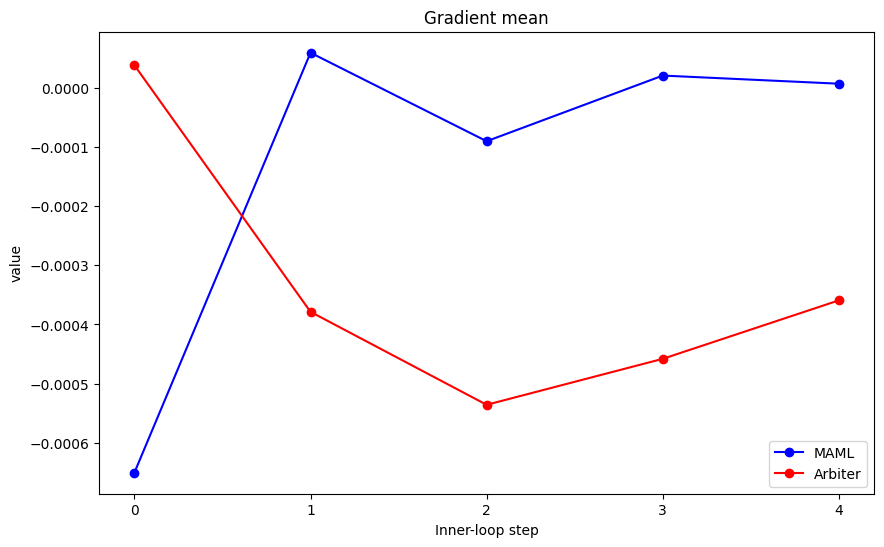

In [24]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_info_mini_imagenet['all_grads_mean'].mean()
# arbiter_mean_df = arbiter_info_mini_imagenet['pre_all_grads_mean'].mean()
arbiter_mean_df = arbiter_info_mini_imagenet['all_grads_mean'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
# maml_means = np.log(maml_means)
# arbiter_means = np.log(arbiter_means)
# arbiter_withoutWN_means = np.log(arbiter_withoutWN_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Gradient mean')

Text(0.5, 1.0, 'Weight norm')

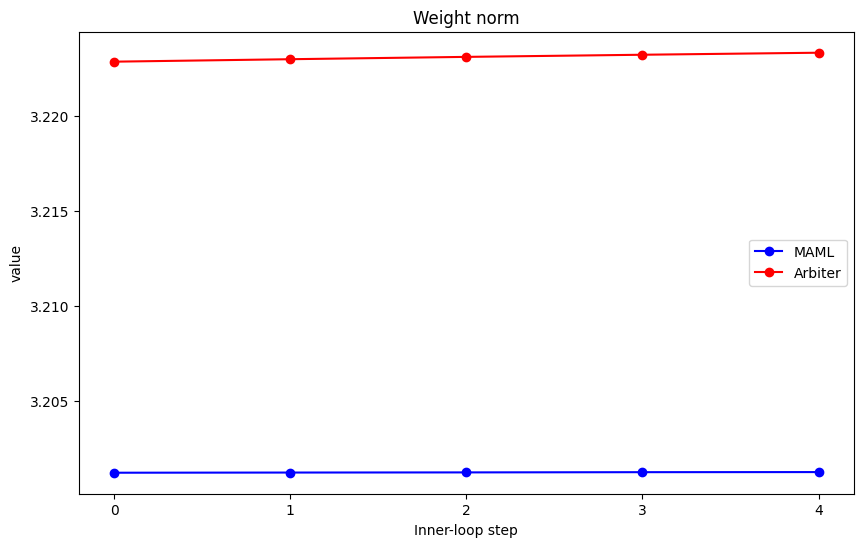

In [25]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_info_mini_imagenet['all_weights_norm'].mean()
arbiter_mean_df = arbiter_info_mini_imagenet['all_weights_norm'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Weight norm')

Text(0.5, 1.0, 'Weight variance')

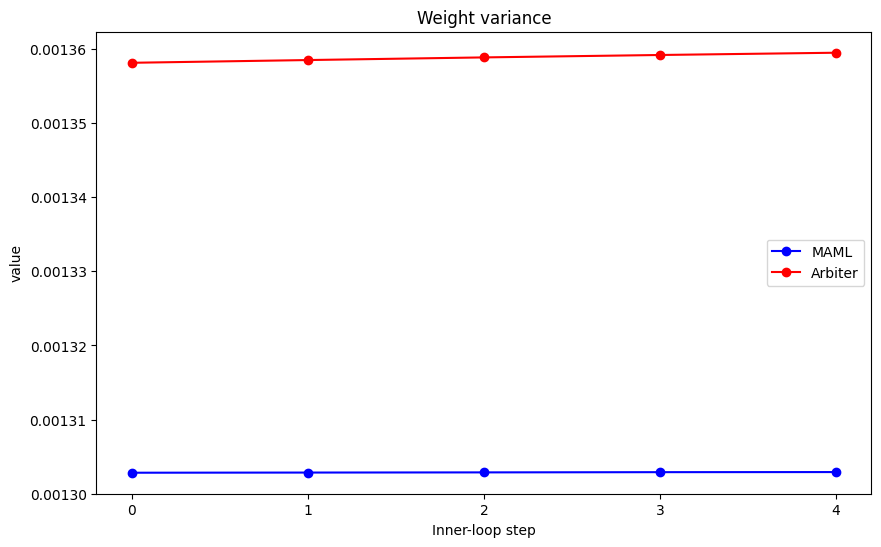

In [26]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_info_mini_imagenet['all_weights_var'].mean()
arbiter_mean_df = arbiter_info_mini_imagenet['all_weights_var'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
# maml_means = np.log(maml_means)
# arbiter_means = np.log(arbiter_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Weight variance')